In [17]:
import cv2
import numpy as np
# 生成色相矩阵
m1 = np.arange(0,255,1)
m1 = m1.reshape(-1, 1)
m2 = np.multiply(m1, np.array([1,1,1]))
m3 = m2.flatten().reshape(1, -1)
m4 = np.ones([600, 1])
m5 = np.multiply(m4, m3).astype(np.uint8)
# 生成hsv矩阵
cv2.imshow("1", m5*10)
cv2.waitKey()

In [4]:
import openpyxl
from openpyxl import Workbook
import os

def load_xlsx(filename='./date.xlsx'):
    datasheet = openpyxl.load_workbook(filename)
    print("加载%s成功" % filename)
    return datasheet
    
def read_sheet(datasheet, sheetnumber=0):   
    # 载入数据
    sheet = datasheet[datasheet.sheetnames[sheetnumber]]
    dic = {}
    count = 0
    for col in sheet.columns:
        # 循环处理每一行的数据
        count += 1
        if count > 3:
            break
        data = []
        for cell in col:
            if cell.value == None:
                cell.value = 0
            data.append(cell.value)
        # 更新到dic中
        dic.update({data[0]: data[1:]})
    print("载入数据中")
    return dic

datesheet = load_xlsx(r"D:\Desktop\EndNoteHere\researchHere\组会PPT\20221025-灰度&温度拟合.xlsx")
dictionary = read_sheet(datesheet, sheetnumber=5)

print(dictionary)

加载D:\Desktop\EndNoteHere\researchHere\组会PPT\20221025-灰度&温度拟合.xlsx成功
载入数据中
{'T': [1100, 1090, 1080, 1070, 1060, 1050, 1040, 1030, 1020, 1010, 1000, 990, 980, 970, 960, 950, 940, 930, 920, 910, 900, 890, 880, 870, 860, 850, 840, 820, 810, 800, 790, 780, 770, 760, 750, 740, 730, 720, 710, 700, 690, 680, 670, 660, 650, 640, 630, 620, 610, 600], 'G1': [3660, 3300, 3230, 2874, 2635, 2357, 2122, 1933, 1680, 1533, 1376, 1216, 1079, 960, 867, 777, 692, 614, 543, 486, 440, 386, 336, 302, 263, 232, 202, 152, 131, 114, 97, 83, 74, 61, 51, 43, 36, 30, 25, 21, 17, 14, 12, 11, 10, 9, 8, 8, 8, 8], 'G2': [1466, 1300, 1265, 1090, 1000, 910, 797, 697, 590, 536, 475, 413, 358, 310, 277, 246, 213, 187, 166, 143, 128, 110, 94, 83, 72, 63, 54, 39, 33, 28, 23, 19, 17, 14, 11, 9, 9, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6]}


linear


d:\Users\lenovo\Anaconda3\envs\school\lib\site-packages\scipy\interpolate\interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\Users\lenovo\Anaconda3\envs\school\lib\site-packages\scipy\interpolate\interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


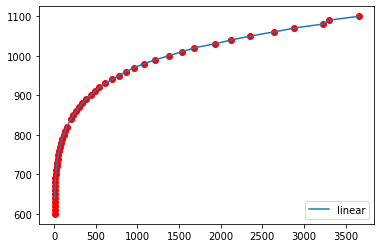

In [8]:
import numpy as np
from scipy import interpolate
import pylab as pl

x=dictionary['G1']
y=dictionary['T']

xnew=np.linspace(8,3660,3653)

pl.plot(x,y,'ro')
list1=['linear','nearest', 'zero', 'slinear']
list2=[0,1,2,3,4,5,6,7,8,9]
for kind in list1:
    print(kind)
    f=interpolate.interp1d(x,y,kind=kind, bounds_error = False, fill_value="extrapolate")
    #f是一个函数，用这个函数就可以找插值点的函数值了：
    ynew=f(xnew)
    pl.plot(xnew,ynew,label=kind)

pl.legend(loc='lower right')
pl.show()